In [23]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

En primer lugar realizamos una lectura y exploración inicial del dataset

In [2]:
df = pd.read_csv("C:/Users/hfdez/Python/Proyecto I/activaciones_samur_2024.csv", sep=";")
df

,Año,Mes,Hora Solicitud,Hora Intervención,Código,Distrito,Hospital
0,2024,ENERO,0:03:49,0:06:39,Heridas,CHAMBERI,La Paz
1,2023,ENERO,0:05:55,0:20:38,Atención psicológica a Familiares y allegados,CIUDAD LINEAL,NaN
2,2023,ENERO,0:05:55,0:20:38,Inconsciente sin filiar causa,CIUDAD LINEAL,NaN
3,2024,ENERO,0:16:34,0:21:20,Patología respiratoria,CHAMBERI,Clínico San Carlos
4,2024,ENERO,0:17:12,NaN,Agresión sin especificar,CENTRO,NaN
...,...,...,...,...,...,...,...
35408,2024,MARZO,23:51:17,NaN,Otros,CHAMARTIN,NaN
35409,2024,MARZO,23:57:12,0:06:59,Intoxicación etílica,NaN,La Princesa
35410,2024,MARZO,23:58:27,0:03:56,Certificación psiquiátrico,CIUDAD LINEAL,Gregorio Marañón
35411,2024,MARZO,NaN,NaN,Heridas,CENTRO,NaN


In [3]:
# Lista de hospitales específicos que me interesa seleccionar
hospitales_seleccionados = ["La Paz", "Gregorio Marañón", "Doce de Octubre", "Ramón y Cajal"]
# Filtramos el dataset unicamente para nuestros 4 hospitales
df_filtrado = df[df['Hospital'].isin(hospitales_seleccionados)]

# Mostramos el dataset filtrado
df_filtrado

,Año,Mes,Hora Solicitud,Hora Intervención,Código,Distrito,Hospital
0,2024,ENERO,0:03:49,0:06:39,Heridas,CHAMBERI,La Paz
15,2024,ENERO,0:49:33,0:56:20,Quemado,VALLECAS PTE.,Gregorio Marañón
24,2024,ENERO,1:22:56,1:36:19,Orden medica,CIUDAD LINEAL,Ramón y Cajal
25,2024,ENERO,1:23:18,1:23:18,"Casual: caída, etc",TETUAN,La Paz
28,2024,ENERO,1:32:56,1:38:10,"Casual: caída, etc",SALAMANCA,Gregorio Marañón
...,...,...,...,...,...,...,...
35394,2024,MARZO,22:14:11,22:19:44,Heridas,RETIRO,Gregorio Marañón
35399,2024,MARZO,22:41:12,22:48:14,Accidente de bicicleta,VALLECAS PTE.,Gregorio Marañón
35400,2024,MARZO,22:45:34,22:51:36,Convulsión y/o epilepsia,CENTRO,Gregorio Marañón
35402,2024,MARZO,22:54:50,23:01:35,Otros,ARGANZUELA,Gregorio Marañón


In [4]:
# Mostramos las primeras filas del dataset
print("Primeras filas del dataset:")
df_filtrado.head()

Primeras filas del dataset:


,Año,Mes,Hora Solicitud,Hora Intervención,Código,Distrito,Hospital
0,2024,ENERO,0:03:49,0:06:39,Heridas,CHAMBERI,La Paz
15,2024,ENERO,0:49:33,0:56:20,Quemado,VALLECAS PTE.,Gregorio Marañón
24,2024,ENERO,1:22:56,1:36:19,Orden medica,CIUDAD LINEAL,Ramón y Cajal
25,2024,ENERO,1:23:18,1:23:18,"Casual: caída, etc",TETUAN,La Paz
28,2024,ENERO,1:32:56,1:38:10,"Casual: caída, etc",SALAMANCA,Gregorio Marañón


In [5]:
# Mostramos las últimas filas del dataset
print("\nÚltimas filas del dataset:")
df_filtrado.tail()


Últimas filas del dataset:


,Año,Mes,Hora Solicitud,Hora Intervención,Código,Distrito,Hospital
35394,2024,MARZO,22:14:11,22:19:44,Heridas,RETIRO,Gregorio Marañón
35399,2024,MARZO,22:41:12,22:48:14,Accidente de bicicleta,VALLECAS PTE.,Gregorio Marañón
35400,2024,MARZO,22:45:34,22:51:36,Convulsión y/o epilepsia,CENTRO,Gregorio Marañón
35402,2024,MARZO,22:54:50,23:01:35,Otros,ARGANZUELA,Gregorio Marañón
35410,2024,MARZO,23:58:27,0:03:56,Certificación psiquiátrico,CIUDAD LINEAL,Gregorio Marañón


In [6]:
#Sacamos la información general del dataset y obtenemos el número de filas y columnas
rows, columns = df_filtrado.shape
print(f"Número de filas: {rows}")
print(f"Número de columnas: {columns}")

# Obtenemos información general del dataset
info = df_filtrado.info()

# Obtenemos tipos de datos de cada columna
data_types = df_filtrado.dtypes
print(data_types)

Número de filas: 6767
Número de columnas: 7
<class 'pandas.core.frame.DataFrame'>
Index: 6767 entries, 0 to 35410
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Año                6767 non-null   int64 
 1   Mes                6767 non-null   object
 2   Hora Solicitud     6767 non-null   object
 3   Hora Intervención  6767 non-null   object
 4   Código             6762 non-null   object
 5   Distrito           6744 non-null   object
 6   Hospital           6767 non-null   object
dtypes: int64(1), object(6)
memory usage: 422.9+ KB
Año                   int64
Mes                  object
Hora Solicitud       object
Hora Intervención    object
Código               object
Distrito             object
Hospital             object
dtype: object


A continuación se hace una limpieza y un preprocesamiento de datos

In [7]:
#Nos aseguramos de que el tipo de datos sea adecuado en cada caso

def convertir_tipos_de_datos(df_filtrado):
    # Convertimos la colimna Año a entero
    df_filtrado['Año'] = df_filtrado['Año'].astype(int)

    # Convertimos la columna Mes a categoría
    df_filtrado['Mes'] = df_filtrado['Mes'].astype('category')

    # Convertimos las columnas Hora Solicitud y Hora Intervención a tipo datetime
    df_filtrado['Hora Solicitud'] = pd.to_datetime(df_filtrado['Hora Solicitud'], format='%H:%M:%S', errors='coerce')
    df_filtrado['Hora Intervención'] = pd.to_datetime(df_filtrado['Hora Intervención'], format='%H:%M:%S', errors='coerce')

    # Convertimos las columnas Código, Distrito y Hospital a cadenas
    df_filtrado['Código'] = df_filtrado['Código'].astype(str)
    df_filtrado['Distrito'] = df_filtrado['Distrito'].astype(str)
    df_filtrado['Hospital'] = df_filtrado['Hospital'].astype(str)

    return df_filtrado

# Verificamos como queda el dataset después de la conversión
print(df_filtrado.dtypes)
df_filtrado

Año                   int64
Mes                  object
Hora Solicitud       object
Hora Intervención    object
Código               object
Distrito             object
Hospital             object
dtype: object


,Año,Mes,Hora Solicitud,Hora Intervención,Código,Distrito,Hospital
0,2024,ENERO,0:03:49,0:06:39,Heridas,CHAMBERI,La Paz
15,2024,ENERO,0:49:33,0:56:20,Quemado,VALLECAS PTE.,Gregorio Marañón
24,2024,ENERO,1:22:56,1:36:19,Orden medica,CIUDAD LINEAL,Ramón y Cajal
25,2024,ENERO,1:23:18,1:23:18,"Casual: caída, etc",TETUAN,La Paz
28,2024,ENERO,1:32:56,1:38:10,"Casual: caída, etc",SALAMANCA,Gregorio Marañón
...,...,...,...,...,...,...,...
35394,2024,MARZO,22:14:11,22:19:44,Heridas,RETIRO,Gregorio Marañón
35399,2024,MARZO,22:41:12,22:48:14,Accidente de bicicleta,VALLECAS PTE.,Gregorio Marañón
35400,2024,MARZO,22:45:34,22:51:36,Convulsión y/o epilepsia,CENTRO,Gregorio Marañón
35402,2024,MARZO,22:54:50,23:01:35,Otros,ARGANZUELA,Gregorio Marañón


In [8]:
# Creamos un diccionario de mapeo para reemplazar los nombres de los meses por números
meses_map = {
    'ENERO': 1,
    'FEBRERO': 2,
    'MARZO': 3,
}

# Aplicamos el reemplazo usando el método replace
df_filtrado['Mes'] = df_filtrado['Mes'].replace(meses_map)

# Imprimimos el dataset actualizado
df_filtrado

C:\Users\hfdez\AppData\Local\Temp\ipykernel_8384\2812132671.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Mes'] = df_filtrado['Mes'].replace(meses_map)


,Año,Mes,Hora Solicitud,Hora Intervención,Código,Distrito,Hospital
0,2024,1,0:03:49,0:06:39,Heridas,CHAMBERI,La Paz
15,2024,1,0:49:33,0:56:20,Quemado,VALLECAS PTE.,Gregorio Marañón
24,2024,1,1:22:56,1:36:19,Orden medica,CIUDAD LINEAL,Ramón y Cajal
25,2024,1,1:23:18,1:23:18,"Casual: caída, etc",TETUAN,La Paz
28,2024,1,1:32:56,1:38:10,"Casual: caída, etc",SALAMANCA,Gregorio Marañón
...,...,...,...,...,...,...,...
35394,2024,3,22:14:11,22:19:44,Heridas,RETIRO,Gregorio Marañón
35399,2024,3,22:41:12,22:48:14,Accidente de bicicleta,VALLECAS PTE.,Gregorio Marañón
35400,2024,3,22:45:34,22:51:36,Convulsión y/o epilepsia,CENTRO,Gregorio Marañón
35402,2024,3,22:54:50,23:01:35,Otros,ARGANZUELA,Gregorio Marañón


In [9]:
# Debido a que no se pueden calcular estadisticas con strings creamos una función para convertir una cadena HH:MM:SS a horas decimales
def convertir_a_horas_decimales(hora_str):
    try:                                    #Añadimos un try-except para manejar los valores no válidos que no se puedan convertir
        partes = hora_str.split(':')
        horas = int(partes[0])
        minutos = int(partes[1])
        segundos = int(partes[2])
        return horas + minutos / 60 + segundos / 3600
    except AttributeError: 
        return None

# Limpiamos y convertimos los datos
df_filtrado['Hora Solicitud'] = df_filtrado['Hora Solicitud'].astype(str)
df_filtrado['Hora Intervención'] = df_filtrado['Hora Intervención'].astype(str)

# Convertimos las columnas 'Hora Solicitud' y 'Hora Intervención' a horas decimales
df_filtrado['Hora Solicitud Decimal'] = df_filtrado['Hora Solicitud'].apply(convertir_a_horas_decimales)
df_filtrado['Hora Intervención Decimal'] = df_filtrado['Hora Intervención'].apply(convertir_a_horas_decimales)

C:\Users\hfdez\AppData\Local\Temp\ipykernel_8384\621592816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Hora Solicitud'] = df_filtrado['Hora Solicitud'].astype(str)
C:\Users\hfdez\AppData\Local\Temp\ipykernel_8384\621592816.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Hora Intervención'] = df_filtrado['Hora Intervención'].astype(str)
C:\Users\hfdez\AppData\Local\Temp\ipykernel_8384\621592816.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [10]:
# Identificamos los valores faltantes NaN usando la moda/media para reemplazarlos y aquellos datos por encima o por debajo de dos desviaciones típicas de la media los imputamos por la moda/media.

def imputar_nan_y_outliers(df_filtrado):
    # Imputamos NaN con la moda o la media
    for col in df_filtrado.columns:
        if df_filtrado[col].dtype in [np.int64, np.float64]:
            if df_filtrado[col].isnull().any():
                moda = df_filtrado[col].mode()[0]
                media = df_filtrado[col].mean()
                df_filtrado[col].fillna(moda if pd.notnull(moda) else media, inplace=True)

    # Imputamos valores fuera de ±2 desviaciones estándar de la media
    for col in ['Hora Solicitud', 'Hora Intervención']:
        std = df_filtrado[col].std()
        mean = df_filtrado[col].mean()
        lower_bound = mean - 2 * std
        upper_bound = mean + 2 * std

        df_filtrado.loc[df_filtrado[col] < lower_bound, col] = mean
        df_filtrado.loc[df_filtrado[col] > upper_bound, col] = mean

    return df_filtrado

# Verificamo como queda el dataset después de la imputación
df_filtrado

,Año,Mes,Hora Solicitud,Hora Intervención,Código,Distrito,Hospital,Hora Solicitud Decimal,Hora Intervención Decimal
0,2024,1,0:03:49,0:06:39,Heridas,CHAMBERI,La Paz,0.063611,0.110833
15,2024,1,0:49:33,0:56:20,Quemado,VALLECAS PTE.,Gregorio Marañón,0.825833,0.938889
24,2024,1,1:22:56,1:36:19,Orden medica,CIUDAD LINEAL,Ramón y Cajal,1.382222,1.605278
25,2024,1,1:23:18,1:23:18,"Casual: caída, etc",TETUAN,La Paz,1.388333,1.388333
28,2024,1,1:32:56,1:38:10,"Casual: caída, etc",SALAMANCA,Gregorio Marañón,1.548889,1.636111
...,...,...,...,...,...,...,...,...,...
35394,2024,3,22:14:11,22:19:44,Heridas,RETIRO,Gregorio Marañón,22.236389,22.328889
35399,2024,3,22:41:12,22:48:14,Accidente de bicicleta,VALLECAS PTE.,Gregorio Marañón,22.686667,22.803889
35400,2024,3,22:45:34,22:51:36,Convulsión y/o epilepsia,CENTRO,Gregorio Marañón,22.759444,22.860000
35402,2024,3,22:54:50,23:01:35,Otros,ARGANZUELA,Gregorio Marañón,22.913889,23.026389


Realizamos un análisis exploratorio de los datos.

In [11]:
#En primer lugar, realizamos un estudio básico del dataset para recopilar datos importantes.
def calcular_estadisticas_basicas(df):
    estadisticas = {}

    # Seleccionamos únicamente las columnas numéricas
    columnas_numericas = df.select_dtypes(include=[np.number])

    # Calculamos la media de las columnas numéricas
    estadisticas['media'] = columnas_numericas.mean()

    # Calculamos la mediana de las columnas numéricas
    estadisticas['mediana'] = columnas_numericas.median()

    # Calculamos la desviación estándar de las columnas numéricas
    estadisticas['desviacion_estandar'] = columnas_numericas.std()

    return estadisticas

# Aplicamos la función para calcular estadísticas básicas
resultados = calcular_estadisticas_basicas(df_filtrado)

# Imprimimos los resultados
print("Media de cada columna:")
print(resultados['media'])
print("\nMediana de cada columna:")
print(resultados['mediana'])
print("\nDesviación estándar de cada columna:")
print(resultados['desviacion_estandar'])

Media de cada columna:
Año                          2024.000000
Mes                             2.016108
Hora Solicitud Decimal         13.918057
Hora Intervención Decimal      13.953330
dtype: float64

Mediana de cada columna:
Año                          2024.000000
Mes                             2.000000
Hora Solicitud Decimal         14.122500
Hora Intervención Decimal      14.186944
dtype: float64

Desviación estándar de cada columna:
Año                          0.000000
Mes                          0.823578
Hora Solicitud Decimal       5.791335
Hora Intervención Decimal    5.821122
dtype: float64


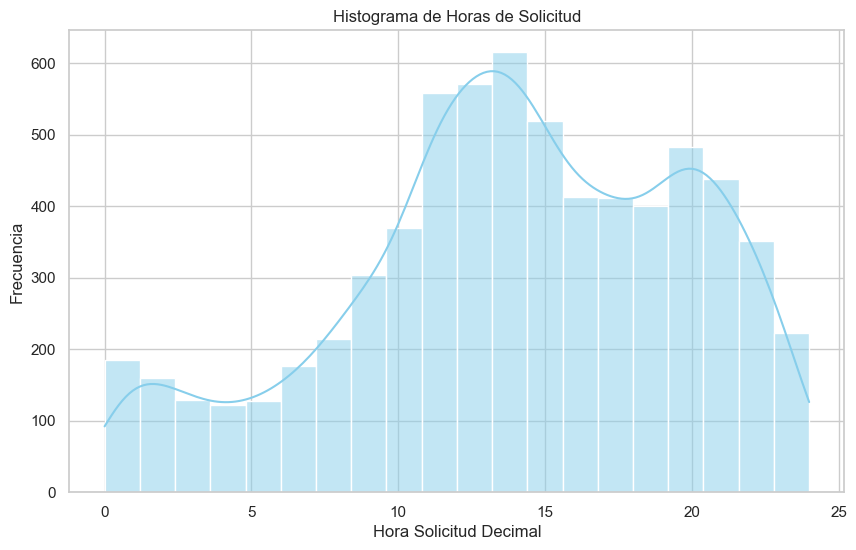

In [12]:
sns.set(style="whitegrid")

# Creamos un  histograma que registra la frecuencia con la que se reciven solicitudes en cada hora.
plt.figure(figsize=(10, 6))
sns.histplot(df_filtrado['Hora Solicitud Decimal'], bins=20, kde=True, color='skyblue')
plt.title('Histograma de Horas de Solicitud')
plt.xlabel('Hora Solicitud Decimal')
plt.ylabel('Frecuencia')
plt.show()

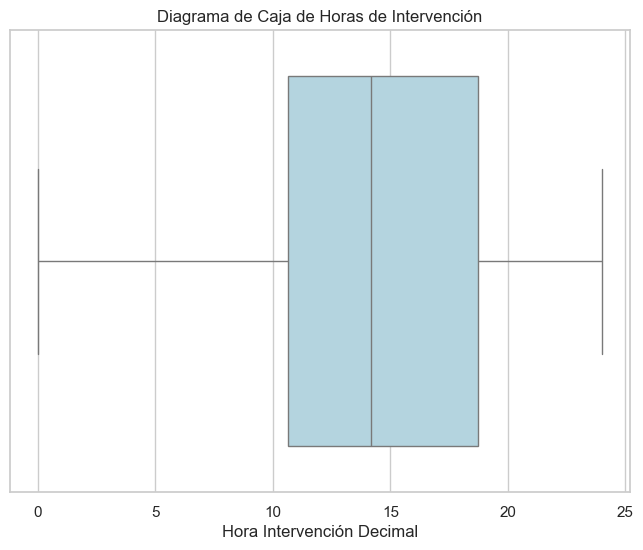

In [13]:
# Creamos un diagrama de caja que indica la frecuencia con la que se realizan intervenciones en las distintas horas de un día a lo largo de los meses.
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtrado['Hora Intervención Decimal'], color='lightblue')
plt.title('Diagrama de Caja de Horas de Intervención')
plt.xlabel('Hora Intervención Decimal')
plt.show()

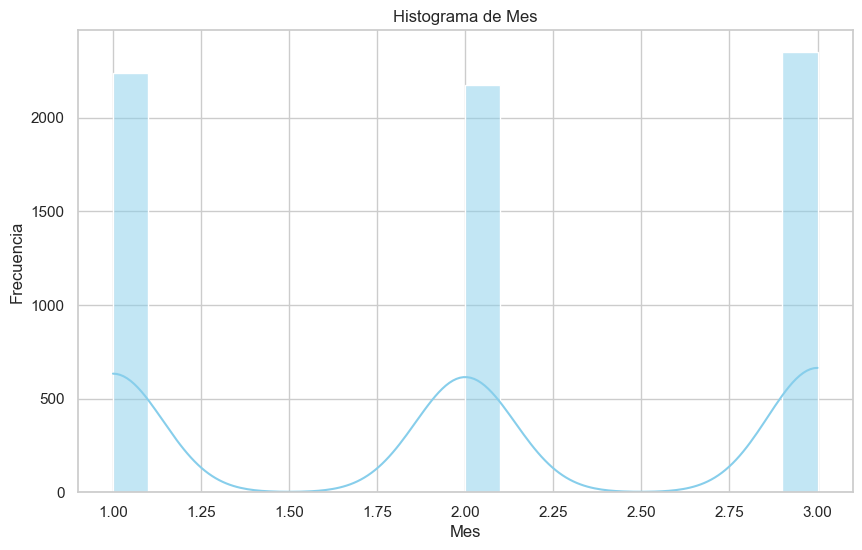

In [14]:
# Creamos un histograma para ver con cuanta frecuencia ocurren solicitudes en cada mes.
plt.figure(figsize=(10, 6))
sns.histplot(df_filtrado['Mes'], bins=20, kde=True, color='skyblue')
plt.title('Histograma de Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

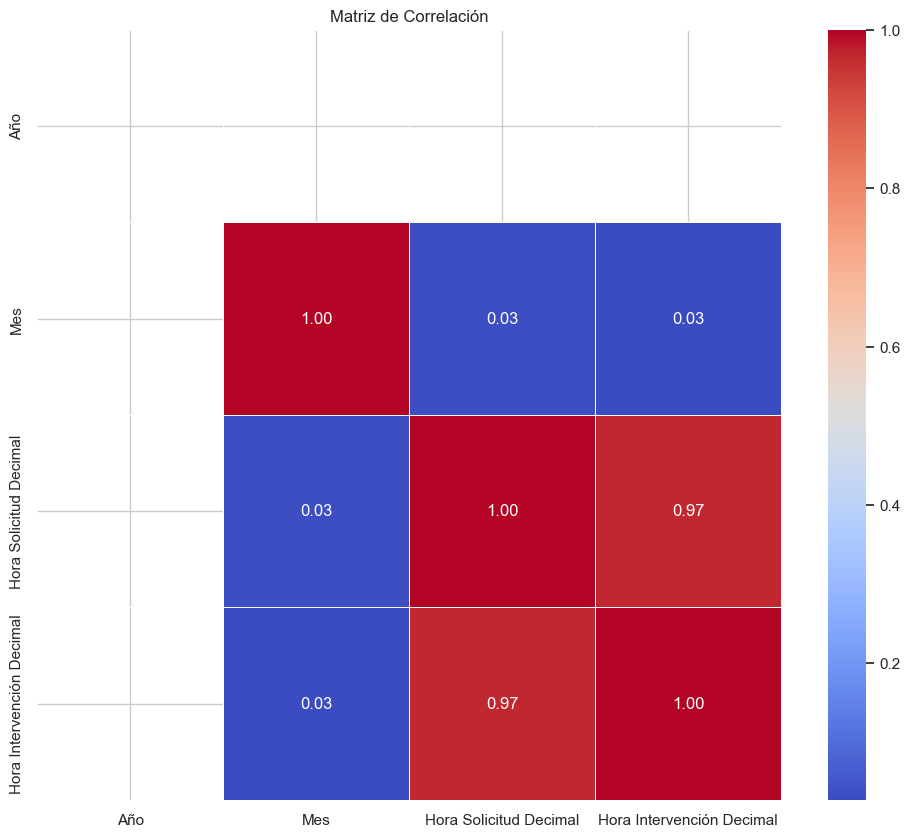

Matriz de Correlación:
                           Año       Mes  Hora Solicitud Decimal  \
Año                        NaN       NaN                     NaN   
Mes                        NaN  1.000000                0.033352   
Hora Solicitud Decimal     NaN  0.033352                1.000000   
Hora Intervención Decimal  NaN  0.027548                0.966042   

                           Hora Intervención Decimal  
Año                                              NaN  
Mes                                         0.027548  
Hora Solicitud Decimal                      0.966042  
Hora Intervención Decimal                   1.000000  


In [15]:
# Primero seleccionamos únicamente las columnas quye nos interesan, es decir, solo columnas numéricas
df_numericas = df_filtrado.select_dtypes(include=['float64', 'int64'])

# Después calculamos la matriz de correlación
correlation_matrix = df_numericas.corr()

#  CONTINUACIÓN, VisualizaMOS la matriz de correlación con un mapa de calor (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Por último, realizamos el análisis de correlaciones
print("Matriz de Correlación:")
print(correlation_matrix)

Manipulación de datos

In [16]:
# Convertimos la columna 'Mes' a valores numéricos enteros
df_filtrado['Mes'] = pd.to_numeric(df_filtrado['Mes'])

# Filtramos el dataset para que solo aparezcan filas a partir del mes de marzo
df_filtrado_marzo = df_filtrado[df_filtrado['Mes'] >= 3]

print("Dataset filtrado para casos únicamente en Marzo:")
print(df_filtrado_marzo)

Dataset filtrado para casos únicamente en Marzo:
        Año  Mes Hora Solicitud Hora Intervención  \
23264  2024    3        2:50:08           3:00:37   
23265  2024    3        2:59:20           3:21:22   
23270  2024    3        3:58:08           4:02:39   
23271  2024    3        4:08:22           4:16:59   
23279  2024    3        5:26:55           5:37:36   
...     ...  ...            ...               ...   
35394  2024    3       22:14:11          22:19:44   
35399  2024    3       22:41:12          22:48:14   
35400  2024    3       22:45:34          22:51:36   
35402  2024    3       22:54:50          23:01:35   
35410  2024    3       23:58:27           0:03:56   

                              Código       Distrito          Hospital  \
23264           Intoxicación etílica     VILLAVERDE   Doce de Octubre   
23265                   Orden medica        BARAJAS     Ramón y Cajal   
23270        Patología psicosomática         CENTRO   Doce de Octubre   
23271           Intoxi

C:\Users\hfdez\AppData\Local\Temp\ipykernel_8384\174911703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Mes'] = pd.to_numeric(df_filtrado['Mes'])


In [17]:
# Creamos una nueva columna llamada 'Tiempo Asistencia' que indica la diferencia entre las horas de solicitud y la de intervención.
df_filtrado['Tiempo Asistencia'] = df_filtrado['Hora Intervención Decimal'] - df_filtrado['Hora Solicitud Decimal']

print("DataFrame con la nueva columna 'Tiempo Asistencia':")
df_filtrado

DataFrame con la nueva columna 'Tiempo Asistencia':


C:\Users\hfdez\AppData\Local\Temp\ipykernel_8384\2157022274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Tiempo Asistencia'] = df_filtrado['Hora Intervención Decimal'] - df_filtrado['Hora Solicitud Decimal']


,Año,Mes,Hora Solicitud,Hora Intervención,Código,Distrito,Hospital,Hora Solicitud Decimal,Hora Intervención Decimal,Tiempo Asistencia
0,2024,1,0:03:49,0:06:39,Heridas,CHAMBERI,La Paz,0.063611,0.110833,0.047222
15,2024,1,0:49:33,0:56:20,Quemado,VALLECAS PTE.,Gregorio Marañón,0.825833,0.938889,0.113056
24,2024,1,1:22:56,1:36:19,Orden medica,CIUDAD LINEAL,Ramón y Cajal,1.382222,1.605278,0.223056
25,2024,1,1:23:18,1:23:18,"Casual: caída, etc",TETUAN,La Paz,1.388333,1.388333,0.000000
28,2024,1,1:32:56,1:38:10,"Casual: caída, etc",SALAMANCA,Gregorio Marañón,1.548889,1.636111,0.087222
...,...,...,...,...,...,...,...,...,...,...
35394,2024,3,22:14:11,22:19:44,Heridas,RETIRO,Gregorio Marañón,22.236389,22.328889,0.092500
35399,2024,3,22:41:12,22:48:14,Accidente de bicicleta,VALLECAS PTE.,Gregorio Marañón,22.686667,22.803889,0.117222
35400,2024,3,22:45:34,22:51:36,Convulsión y/o epilepsia,CENTRO,Gregorio Marañón,22.759444,22.860000,0.100556
35402,2024,3,22:54:50,23:01:35,Otros,ARGANZUELA,Gregorio Marañón,22.913889,23.026389,0.112500


In [18]:
# Ajustamos los valores negativos en 'Tiempo Asistencia' sumando 24 horas para que nos den el tiempo real.
df_filtrado['Tiempo Asistencia'] = df_filtrado['Tiempo Asistencia'].apply(lambda x: x + 24 if x < 0 else x)

print("DataFrame ajustado con 'Tiempo Asistencia' positivo:")
df_filtrado

DataFrame ajustado con 'Tiempo Asistencia' positivo:


C:\Users\hfdez\AppData\Local\Temp\ipykernel_8384\3629825338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Tiempo Asistencia'] = df_filtrado['Tiempo Asistencia'].apply(lambda x: x + 24 if x < 0 else x)


,Año,Mes,Hora Solicitud,Hora Intervención,Código,Distrito,Hospital,Hora Solicitud Decimal,Hora Intervención Decimal,Tiempo Asistencia
0,2024,1,0:03:49,0:06:39,Heridas,CHAMBERI,La Paz,0.063611,0.110833,0.047222
15,2024,1,0:49:33,0:56:20,Quemado,VALLECAS PTE.,Gregorio Marañón,0.825833,0.938889,0.113056
24,2024,1,1:22:56,1:36:19,Orden medica,CIUDAD LINEAL,Ramón y Cajal,1.382222,1.605278,0.223056
25,2024,1,1:23:18,1:23:18,"Casual: caída, etc",TETUAN,La Paz,1.388333,1.388333,0.000000
28,2024,1,1:32:56,1:38:10,"Casual: caída, etc",SALAMANCA,Gregorio Marañón,1.548889,1.636111,0.087222
...,...,...,...,...,...,...,...,...,...,...
35394,2024,3,22:14:11,22:19:44,Heridas,RETIRO,Gregorio Marañón,22.236389,22.328889,0.092500
35399,2024,3,22:41:12,22:48:14,Accidente de bicicleta,VALLECAS PTE.,Gregorio Marañón,22.686667,22.803889,0.117222
35400,2024,3,22:45:34,22:51:36,Convulsión y/o epilepsia,CENTRO,Gregorio Marañón,22.759444,22.860000,0.100556
35402,2024,3,22:54:50,23:01:35,Otros,ARGANZUELA,Gregorio Marañón,22.913889,23.026389,0.112500


In [19]:
# Iteramos sobre las columnas para calcular estadísticas
for col in df_filtrado.columns:
    if pd.api.types.is_numeric_dtype(df_filtrado[col]):
        mean_value = df_filtrado[col].mean()
        std_dev = df_filtrado[col].std()
        
        print(f"Estadísticas de la columna {col}:")
        print(f"  Media: {mean_value:.2f}")
        print(f"  Desviación estándar: {std_dev:.2f}")
        print()

Estadísticas de la columna Año:
  Media: 2024.00
  Desviación estándar: 0.00

Estadísticas de la columna Mes:
  Media: 2.02
  Desviación estándar: 0.82

Estadísticas de la columna Hora Solicitud Decimal:
  Media: 13.92
  Desviación estándar: 5.79

Estadísticas de la columna Hora Intervención Decimal:
  Media: 13.95
  Desviación estándar: 5.82

Estadísticas de la columna Tiempo Asistencia:
  Media: 0.13
  Desviación estándar: 0.07

